<a href="https://colab.research.google.com/github/Neel1015/Data-Analysis/blob/main/EDA_on_terrorist_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('/content/terrorist-attacks.csv')

In [37]:
data.head()

,Entity,Code,Year,Terrorist attacks,Terrorism deaths,Attack method: Hijacking,Attack method: Hostage Taking (Barricade Incident),Attack method: Unarmed Assault,Attack method: Facility/Infrastructure Attack,Attack method: Hostage Taking (Kidnapping),...,Attack method: Armed Assault,Attack method: Bombing/Explosion,Death Age 100+,Death Age: 51-99,Death Age : 21-50,Death Age : 11-20,Death Age : 6-10,Death Age : 1-5,Terrorist Death Type : Suicide,Terrorist Death Type : Killed
0,Afghanistan,AFG,1970,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,AFG,1971,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,AFG,1972,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,AFG,1973,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,AFG,1974,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Basic information about the dataset
print("Basic Information about the dataset:")
print(data.info())

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Entity                                              10517 non-null  object
 1   Code                                                9263 non-null   object
 2   Year                                                10517 non-null  int64 
 3   Terrorist attacks                                   10517 non-null  int64 
 4   Terrorism deaths                                    10517 non-null  int64 
 5   Attack method: Hijacking                            10517 non-null  int64 
 6   Attack method: Hostage Taking (Barricade Incident)  10517 non-null  int64 
 7   Attack method: Unarmed Assault                      10517 non-null  int64 
 8   Attack method: Facility/Infrastructure Attack    

In [39]:
# Descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
               Year  Terrorist attacks  Terrorism deaths  \
count  10517.000000       10517.000000      10517.000000   
mean    1996.226871          76.825711        177.472663   
std       15.089465         532.336065       1332.422755   
min     1970.000000           0.000000          0.000000   
25%     1983.000000           0.000000          0.000000   
50%     1997.000000           0.000000          0.000000   
75%     2009.000000           6.000000          4.000000   
max     2021.000000       16820.000000      44576.000000   

       Attack method: Hijacking  \
count              10517.000000   
mean                   0.278311   
std                    1.789789   
min                    0.000000   
25%                    0.000000   
50%                    0.000000   
75%                    0.000000   
max                   58.000000   

       Attack method: Hostage Taking (Barricade Incident)  \
count                                       10517.000000 

In [40]:
# Shape of the dataset
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(10517, 21)


**How many unique entities are there in the dataset?**

In [41]:
unique_entities = data['Entity'].nunique()
print(f"\nNumber of unique entities: {unique_entities}")


Number of unique entities: 221


**What is the distribution of terrorist attacks over the years?**

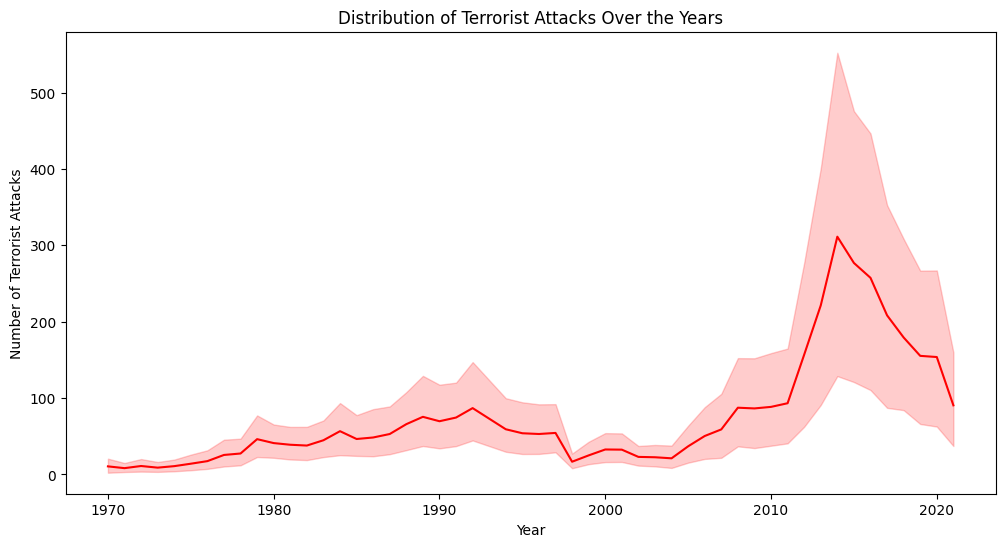

In [42]:
# Distribution of terrorist attacks over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Terrorist attacks', data=data, color='red')
plt.title('Distribution of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Terrorist Attacks')
plt.show()

**Which attack method is most commonly used?**

In [43]:
# Find the most common attack method
most_common_attack = data.iloc[:, 5:13].sum().idxmax()
print(f"\nThe most common attack method is: {most_common_attack}")


The most common attack method is: Attack method: Bombing/Explosion


**What is the proportion of suicide deaths among terrorist attacks?**

In [44]:
# Proportion of suicide deaths
suicide_deaths_proportion = data['Terrorist Death Type : Suicide'].sum() / data['Terrorism deaths'].sum()
print(f"\nProportion of suicide deaths among terrorist attacks: {suicide_deaths_proportion:.2%}")


Proportion of suicide deaths among terrorist attacks: 15.83%


**What is the correlation between the number of terrorist attacks and terrorism deaths?**

In [45]:
# Correlation between terrorist attacks and terrorism deaths
correlation = data['Terrorist attacks'].corr(data['Terrorism deaths'])
print(f"\nCorrelation between the number of terrorist attacks and terrorism deaths: {correlation:.2f}")


Correlation between the number of terrorist attacks and terrorism deaths: 0.96


**What is the trend of armed assaults over the years?**

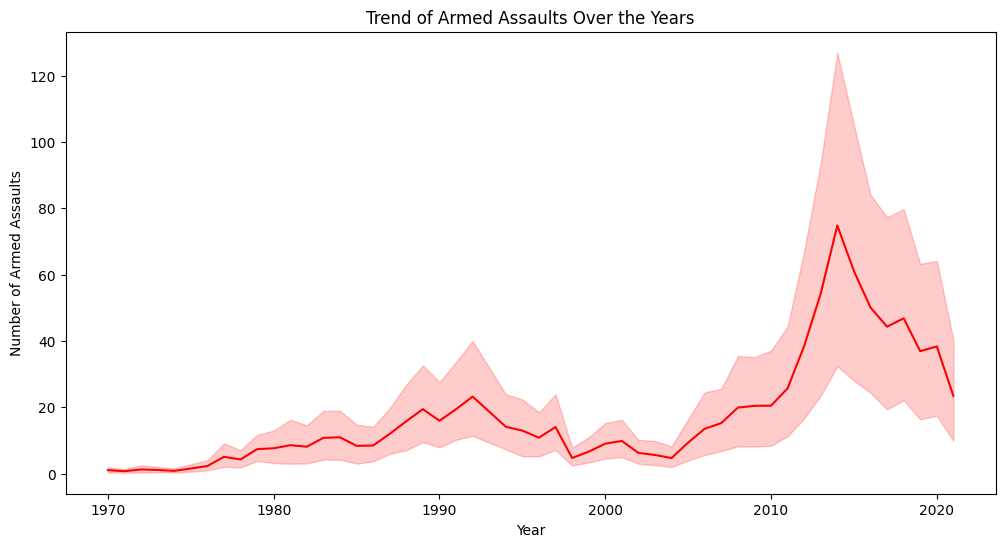

In [46]:
# Trend of armed assaults over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Attack method: Armed Assault', data=data, color='red')
plt.title('Trend of Armed Assaults Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Armed Assaults')
plt.show()

**How are terrorism deaths distributed among different death age groups?**

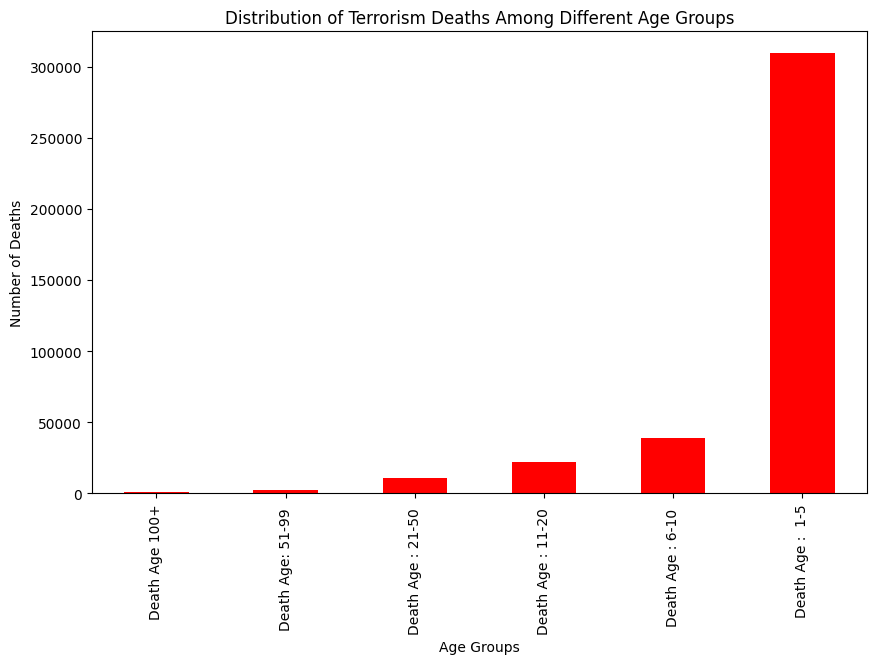

In [47]:
# Distribution of terrorism deaths among different age groups
death_age_columns = data.columns[data.columns.str.startswith('Death Age')]
death_age_distribution = data[death_age_columns].sum()
plt.figure(figsize=(10, 6))
death_age_distribution.plot(kind='bar',color='red')
plt.title('Distribution of Terrorism Deaths Among Different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Deaths')
plt.show()

**Is there a correlation between the number of terrorist attacks and the use of bombings/explosions?**

In [48]:
# Correlation between the number of terrorist attacks and bombings/explosions
correlation_bombing = data['Terrorist attacks'].corr(data['Attack method: Bombing/Explosion'])
print(f"\nCorrelation between the number of terrorist attacks and bombings/explosions: {correlation_bombing:.2f}")


Correlation between the number of terrorist attacks and bombings/explosions: 0.98


**How has the distribution of terrorist death types evolved over the years?**

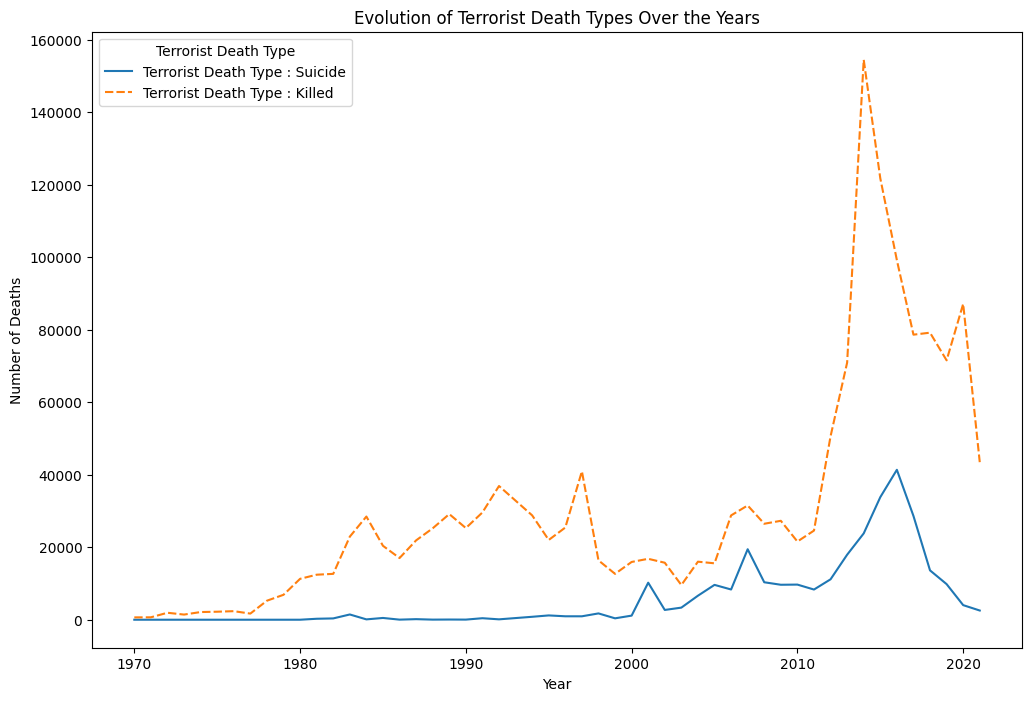

In [49]:
# Evolution of terrorist death types over the years
death_type_columns = data.columns[data.columns.str.startswith('Terrorist Death Type')]
death_type_evolution = data.groupby('Year')[death_type_columns].sum()
plt.figure(figsize=(12, 8))
sns.lineplot(data=death_type_evolution)
plt.title('Evolution of Terrorist Death Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Terrorist Death Type')
plt.show()

**What is the geographical distribution of terrorist attacks?**

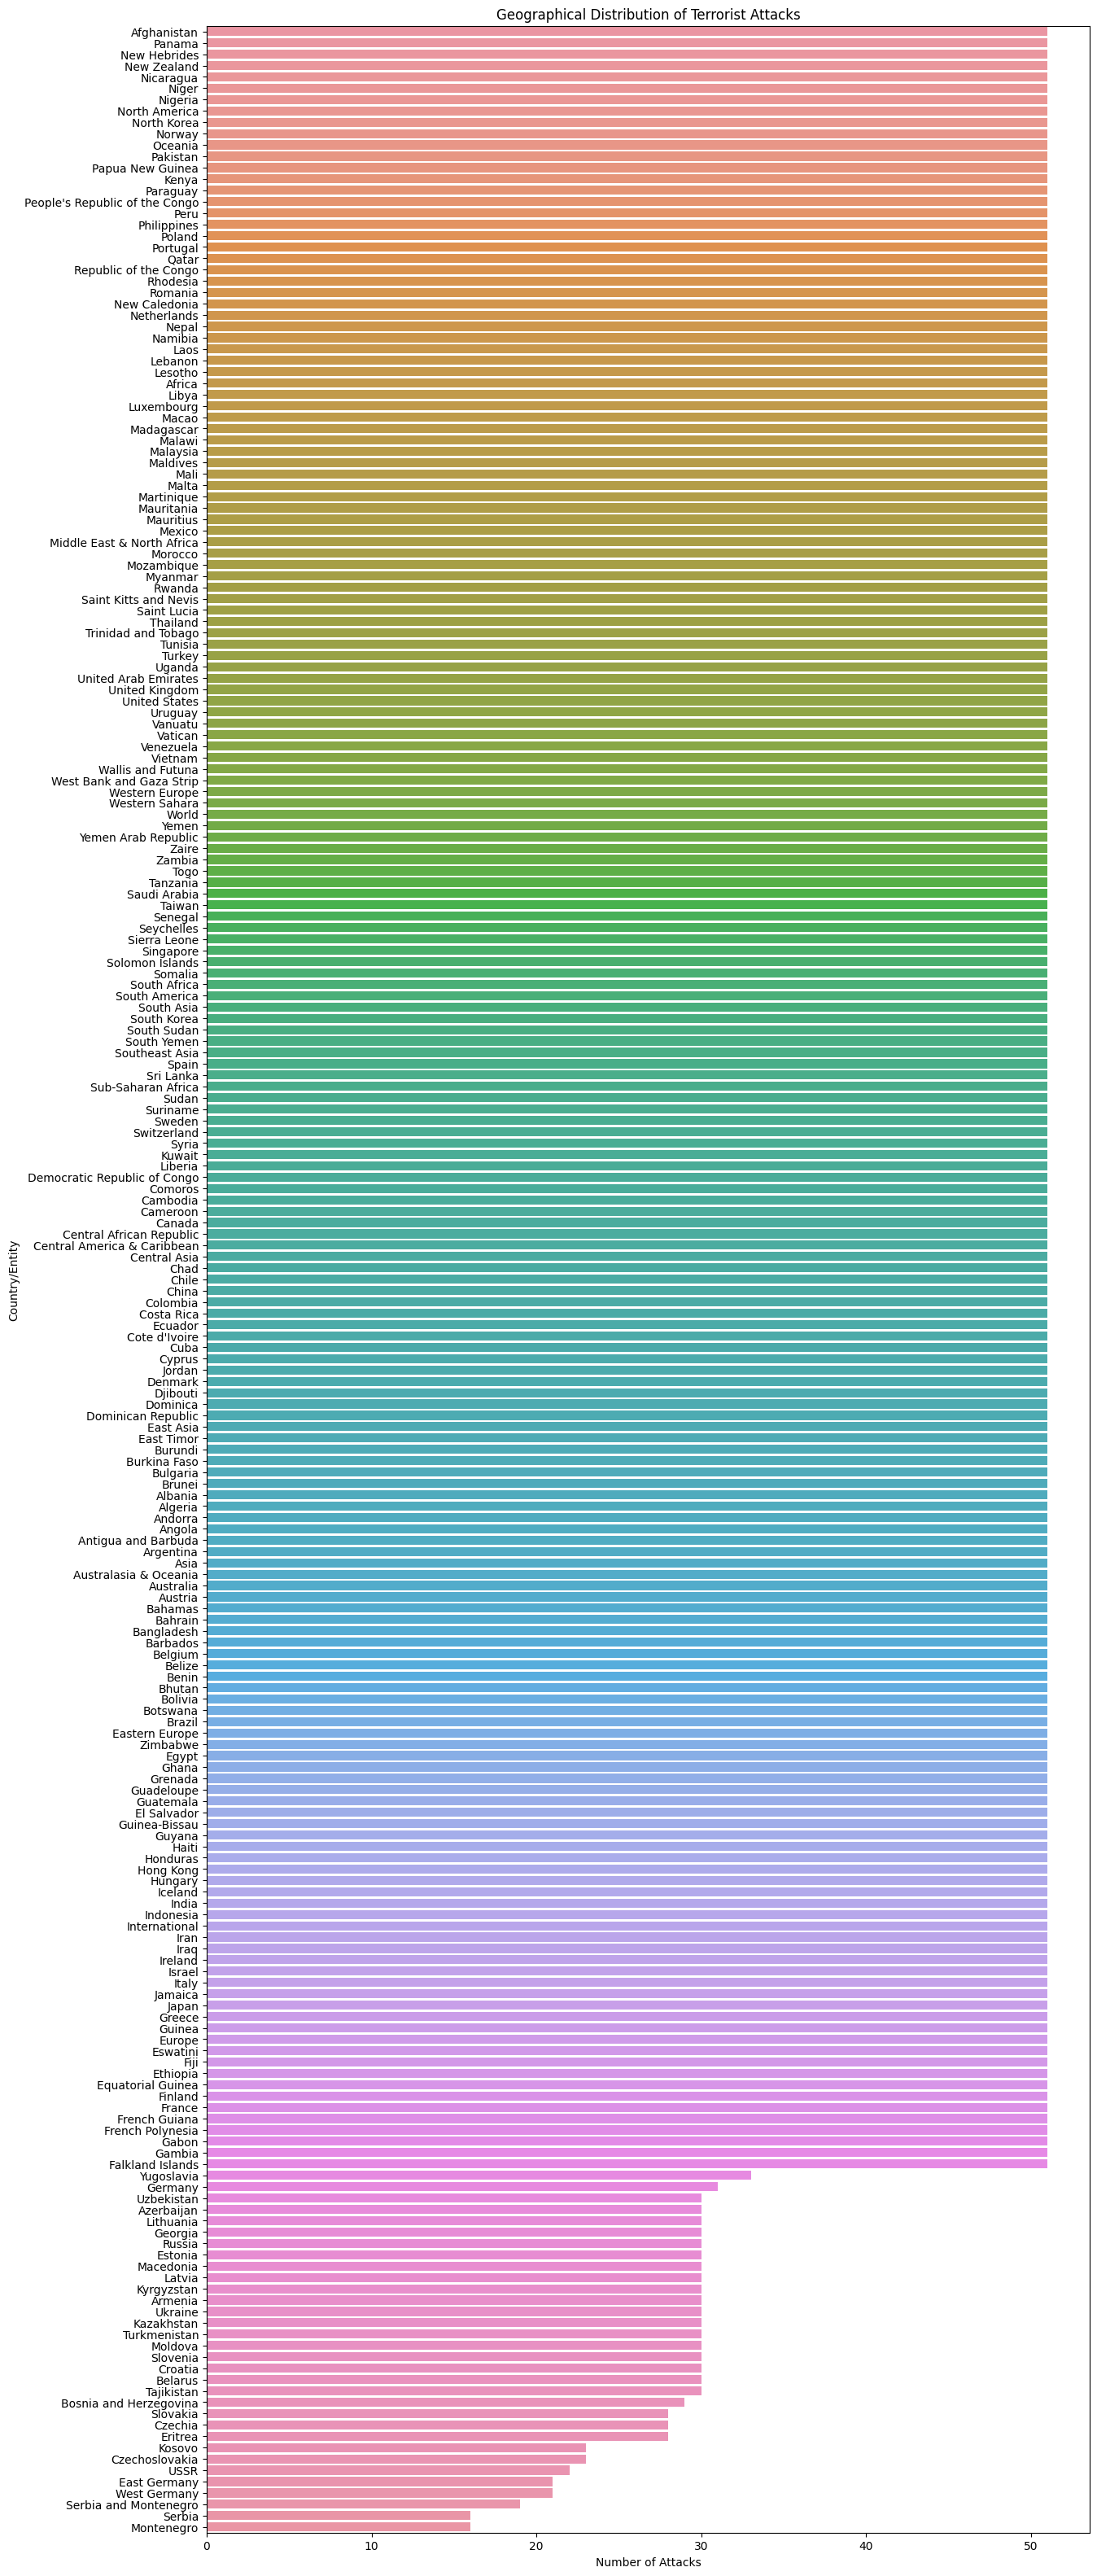

In [50]:
# Geographical distribution of terrorist attacks
plt.figure(figsize=(14, 40))
sns.countplot(y='Entity', data=data, order=data['Entity'].value_counts().index)
plt.title('Geographical Distribution of Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country/Entity')
plt.show()

**What is the trend in the use of hijacking as an attack method?**

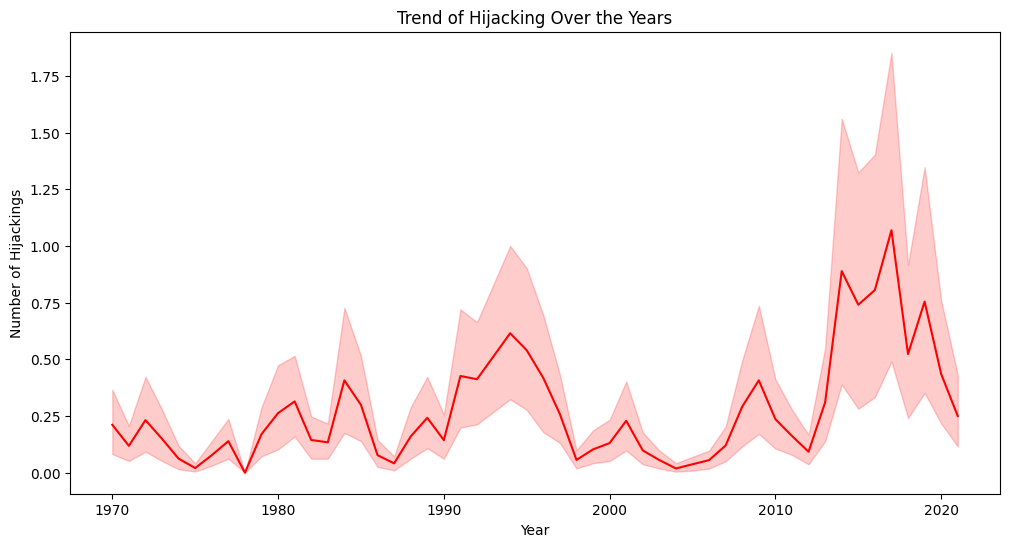

In [51]:
# Trend of hijacking over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Attack method: Hijacking', data=data, color='red')
plt.title('Trend of Hijacking Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Hijackings')
plt.show()

**How are different attack methods correlated with each other?**

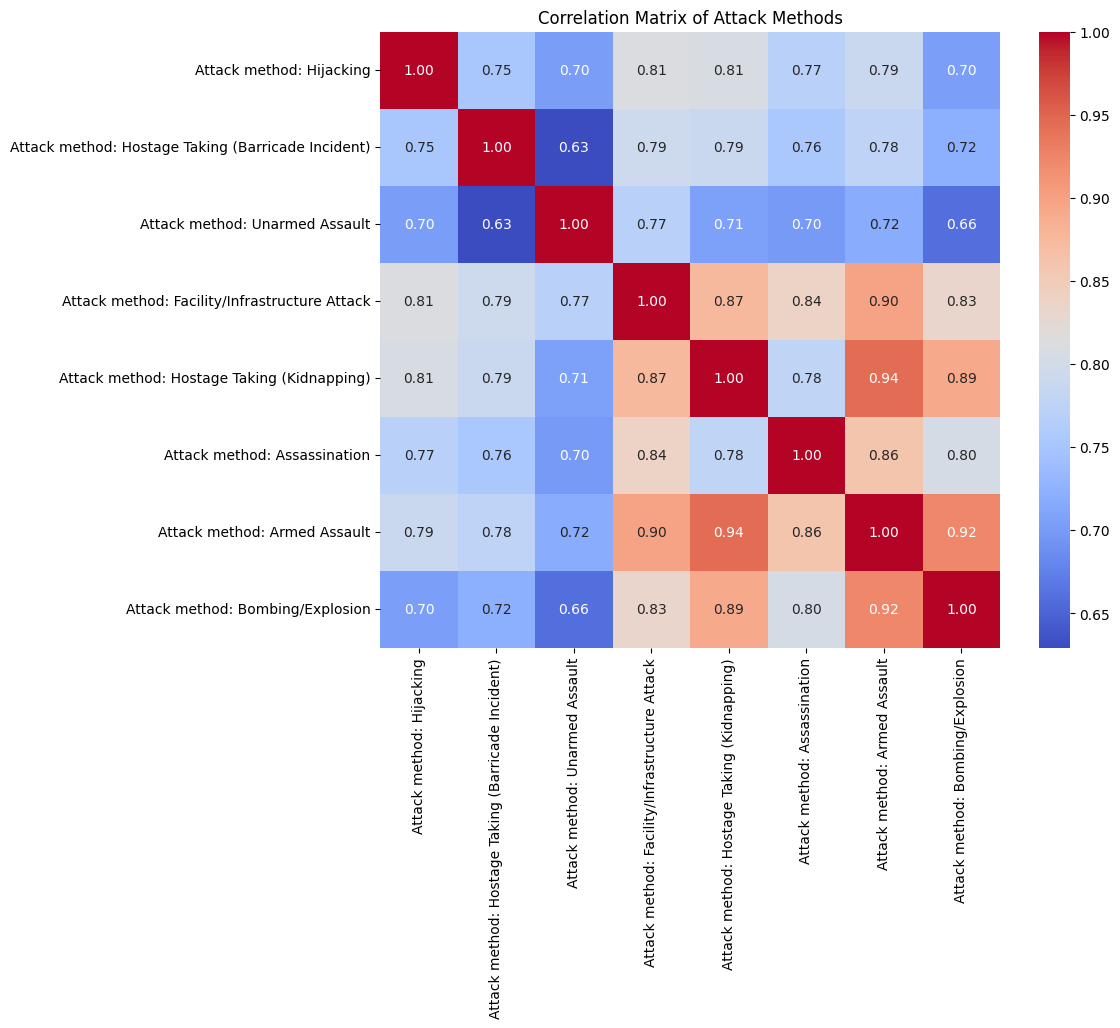

In [52]:
# Correlation matrix of attack methods
attack_methods_corr = data.iloc[:, 5:13].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(attack_methods_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Attack Methods')
plt.show()

**What is the trend in the number of deaths for each death age group?**

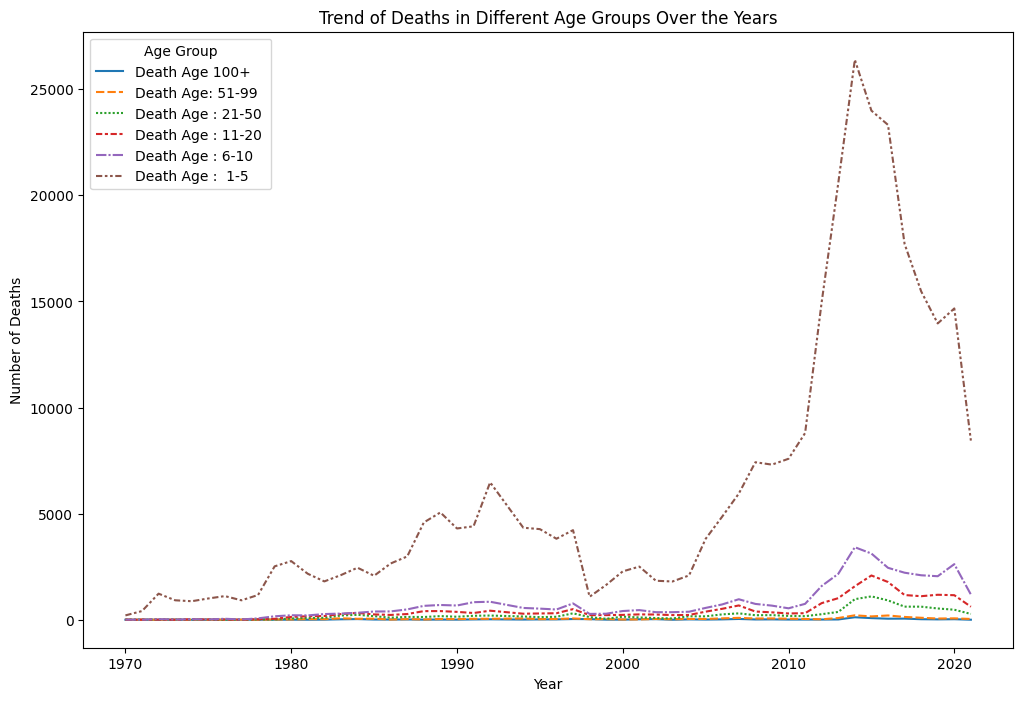

In [53]:
# Trend of deaths in different age groups over the years
death_age_trend = data.groupby('Year')[death_age_columns].sum()
plt.figure(figsize=(12, 8))
sns.lineplot(data=death_age_trend)
plt.title('Trend of Deaths in Different Age Groups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Age Group')
plt.show()

**How many terrorist attacks and deaths occurred in the most recent year?**

In [54]:
# Terrorist attacks and deaths in the most recent year
most_recent_year = data['Year'].max()
recent_year_data = data[data['Year'] == most_recent_year]
attacks_in_recent_year = recent_year_data['Terrorist attacks'].sum()
deaths_in_recent_year = recent_year_data['Terrorism deaths'].sum()
print(f"\nIn the most recent year ({most_recent_year}):")
print(f"Number of terrorist attacks: {attacks_in_recent_year}")
print(f"Number of deaths: {deaths_in_recent_year}")


In the most recent year (2021):
Number of terrorist attacks: 19546
Number of deaths: 45992


**What is the proportion of deaths in different age groups to the total terrorism deaths?**

In [55]:
# Proportion of deaths in different age groups to the total deaths
death_age_proportion = data[death_age_columns].sum() / data['Terrorism deaths'].sum()
print("\nProportion of deaths in different age groups to the total deaths:")
print(death_age_proportion)


Proportion of deaths in different age groups to the total deaths:
Death Age 100+        0.000422
Death Age: 51-99      0.001199
Death Age : 21-50     0.005895
Death Age : 11-20     0.011890
Death Age : 6-10      0.021052
Death Age :  1-5      0.165711
dtype: float64


**How has the distribution of terrorist attacks changed over the years for the top 5 entities with the highest number of attacks?**

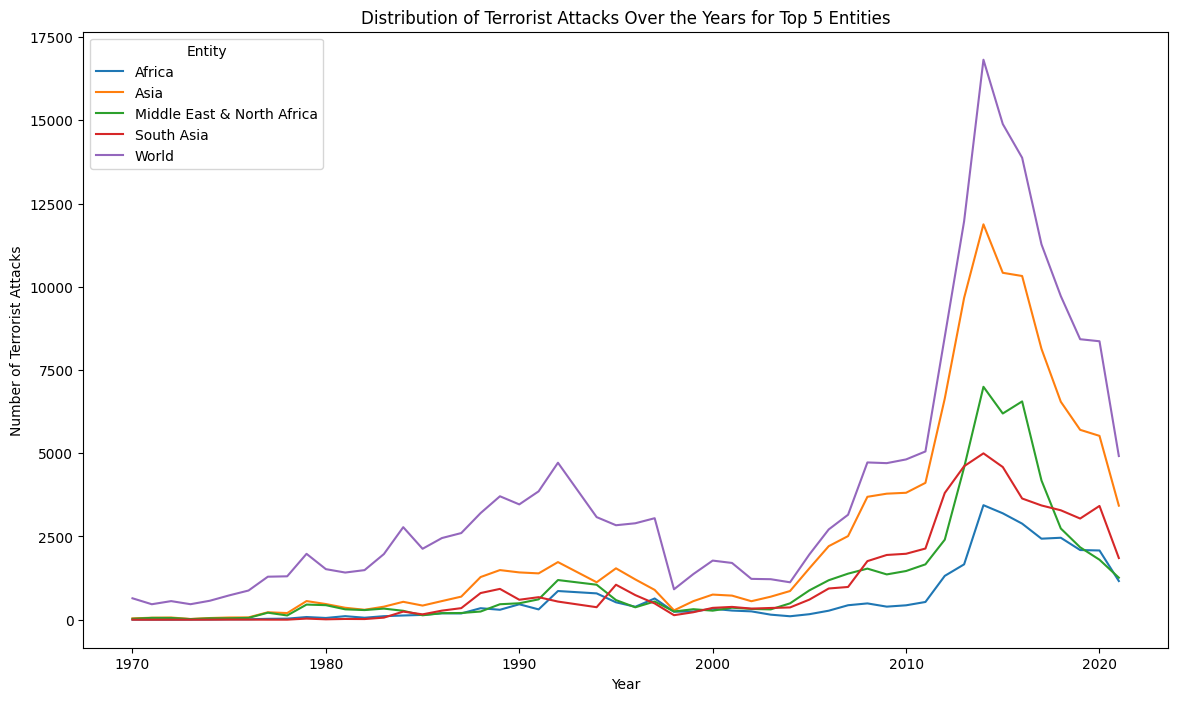

In [56]:
# Top 5 entities with the highest number of attacks
top_entities = data.groupby('Entity')['Terrorist attacks'].sum().nlargest(5).index

# Distribution of attacks over the years for the top 5 entities
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Terrorist attacks', hue='Entity', data=data[data['Entity'].isin(top_entities)])
plt.title('Distribution of Terrorist Attacks Over the Years for Top 5 Entities')
plt.xlabel('Year')
plt.ylabel('Number of Terrorist Attacks')
plt.legend(title='Entity')
plt.show()

**What is the average number of deaths for each attack method?**

In [57]:
# Average number of deaths for each attack method
avg_deaths_by_method = data.groupby('Attack method: Bombing/Explosion')['Terrorism deaths'].mean()
print("\nAverage number of deaths for each attack method:")
print(avg_deaths_by_method)


Average number of deaths for each attack method:
Attack method: Bombing/Explosion
0           2.011679
1          15.977887
2          24.366234
3          30.452381
4          41.901099
            ...     
6661    22256.000000
6921    28445.000000
7344    35109.000000
7666    38876.000000
8739    44576.000000
Name: Terrorism deaths, Length: 466, dtype: float64


**Are there any entities where suicide attacks are more prevalent than other types?**

In [58]:
# Entities where suicide attacks are more prevalent than other types
suicide_prevalence = data[data['Terrorist Death Type : Suicide'] > 0].groupby('Entity').size()
non_suicide_prevalence = data[data['Terrorist Death Type : Suicide'] == 0].groupby('Entity').size()
suicide_ratio = suicide_prevalence / (suicide_prevalence + non_suicide_prevalence)
suicide_entities = suicide_ratio[suicide_ratio > 0.5].index
print("\nEntities where suicide attacks are more prevalent than other types:")
print(suicide_entities)


Entities where suicide attacks are more prevalent than other types:
Index(['Asia', 'Middle East & North Africa', 'Russia', 'South Asia', 'World'], dtype='object', name='Entity')


**What is the distribution of terrorist attacks and deaths by attack method?**

In [59]:
# Distribution of terrorist attacks and deaths by attack method
attack_method_distribution = data.groupby('Attack method: Bombing/Explosion')[['Terrorist attacks', 'Terrorism deaths']].sum()
print("\nDistribution of terrorist attacks and deaths by attack method:")
print(attack_method_distribution)


Distribution of terrorist attacks and deaths by attack method:
                                  Terrorist attacks  Terrorism deaths
Attack method: Bombing/Explosion                                     
0                                              5102             13780
1                                              3595             13006
2                                              3126              9381
3                                              2469              7674
4                                              2214              7626
...                                             ...               ...
6661                                          11968             22256
6921                                          11876             28445
7344                                          13876             35109
7666                                          14888             38876
8739                                          16820             44576

[466 rows x 2 columns]


**Are there any entities where the majority of attacks involve hostage-taking?**

In [60]:
# Entities where the majority of attacks involve hostage-taking
hostage_entities = data[data['Attack method: Hostage Taking (Kidnapping)'] > 0].groupby('Entity').size()
non_hostage_entities = data[data['Attack method: Hostage Taking (Kidnapping)'] == 0].groupby('Entity').size()
hostage_ratio = hostage_entities / (hostage_entities + non_hostage_entities)
hostage_majority_entities = hostage_ratio[hostage_ratio > 0.5].index
print("\nEntities where the majority of attacks involve hostage-taking:")
print(hostage_majority_entities)


Entities where the majority of attacks involve hostage-taking:
Index(['Africa', 'Asia', 'Central America & Caribbean', 'Colombia', 'Europe',
       'India', 'Lebanon', 'Mexico', 'Middle East & North Africa',
       'North America', 'Pakistan', 'Philippines', 'Russia', 'South Asia',
       'Southeast Asia', 'Sub-Saharan Africa', 'Sudan', 'Turkey',
       'United Kingdom', 'Venezuela', 'Western Europe', 'Yemen'],
      dtype='object', name='Entity')


**How has the trend in suicide attacks changed over the years?**

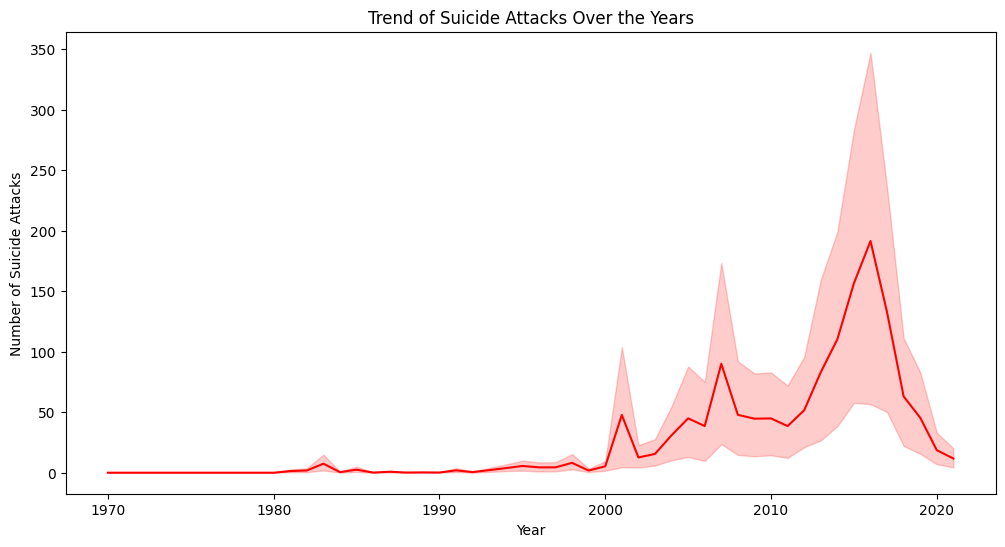

In [61]:
# Trend of suicide attacks over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Terrorist Death Type : Suicide', data=data,color='red')
plt.title('Trend of Suicide Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Suicide Attacks')
plt.show()

**Is there a correlation between the number of deaths and the use of armed assaults?**

In [62]:
# Correlation between the number of deaths and armed assaults
correlation_deaths_armed_assaults = data['Terrorism deaths'].corr(data['Attack method: Armed Assault'])
print(f"\nCorrelation between the number of deaths and armed assaults: {correlation_deaths_armed_assaults:.2f}")


Correlation between the number of deaths and armed assaults: 0.94


**What is the average number of terrorist attacks and deaths per year for entities with at least 10 attacks?**

In [63]:
# Entities with at least 10 attacks
entities_with_10_attacks = data.groupby('Entity')['Terrorist attacks'].sum().loc[lambda x: x >= 10].index

# Average number of terrorist attacks and deaths per year for selected entities
avg_attacks_deaths_per_year = data[data['Entity'].isin(entities_with_10_attacks)].groupby('Entity')[['Terrorist attacks', 'Terrorism deaths']].mean()
print("\nAverage number of terrorist attacks and deaths per year for entities with at least 10 attacks:")
print(avg_attacks_deaths_per_year)


Average number of terrorist attacks and deaths per year for entities with at least 10 attacks:
             Terrorist attacks  Terrorism deaths
Entity                                          
Afghanistan         399.470588       1409.529412
Africa              643.980392       2424.882353
Albania               1.627451          0.823529
Algeria              54.000000        217.568627
Angola                9.823529         60.000000
...                        ...               ...
Yemen               123.862745        268.647059
Yugoslavia            6.151515          3.606061
Zaire                 0.980392          6.352941
Zambia                1.235294          1.372549
Zimbabwe              2.078431          3.078431

[182 rows x 2 columns]


**What is the most common attack method for suicide attacks?**

In [64]:
# Most common attack method for suicide attacks
most_common_method_suicide = data[data['Terrorist Death Type : Suicide'] > 0].iloc[:, 5:13].sum().idxmax()
print(f"\nThe most common attack method for suicide attacks is: {most_common_method_suicide}")


The most common attack method for suicide attacks is: Attack method: Bombing/Explosion


**Can we represent the correlation between terrorist attacks and deaths using a heatmap?**

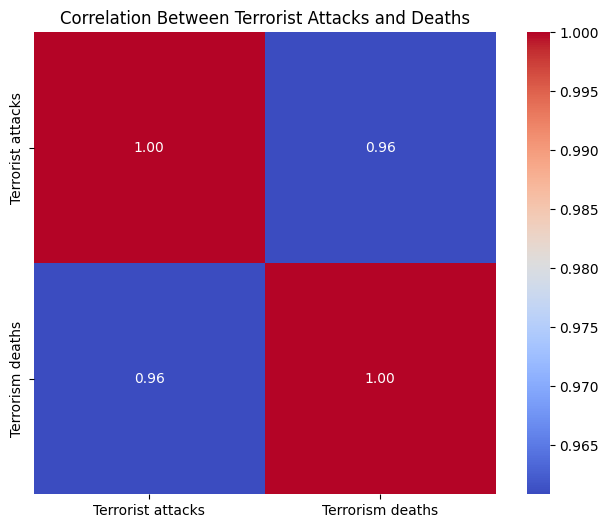

In [65]:
# Heatmap for the correlation between terrorist attacks and deaths
correlation_matrix = data[['Terrorist attacks', 'Terrorism deaths']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Between Terrorist Attacks and Deaths')
plt.show()